# **DMC 2022**

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
from datetime import datetime as dt

# **Understanding the Data Set**

In [2]:
items = pd.read_csv("/content/drive/MyDrive/DMC2022/items.csv", sep="|")
orders = pd.read_csv("/content/drive/MyDrive/DMC2022/orders.csv", sep="|")
category = pd.read_csv("/content/drive/MyDrive/DMC2022/category_hierarchy.csv", sep="|")

In [ ]:
def items_info():
  print("UNDERSTANDING ITEMS DATASET")
  print("\nSample\n",items.head())
  print("\nInformation\n")
  print(items.info())
  print("\nDescriptive Information\n",items.describe())
  print("\n",items.describe(include=object))
  print("\nShape of the dataset\n",items.shape)
  print("\n Unique items in the dataset\n", items.nunique())

In [ ]:
items_info()

UNDERSTANDING ITEMS DATASET

Sample
    itemID  brand  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   22665    861          4          0        490          2         66   
1   28640   1366         10          1        537          0        101   
2   13526   1090         10          0        511          0          0   
3   21399   1090         10          1        511          0          0   
4    8504    768          4          1        484          0         66   

                                          categories  
0                            [2890, 855, 3908, 3909]  
1                                                NaN  
2  [3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...  
3                                             [3270]  
4                                             [2470]  

Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      ---

In [ ]:
def orders_info():
  print("UNDERSTANDING ORDERS DATASET")
  print("\nSample\n",orders.head())
  print("\nInformation\n")
  print(orders.info())
  print("\nDescriptive Information\n",orders.describe())
  print("\n",orders.describe(include=object))
  print("\nShape of the dataset\n",orders.shape)
  print("\n Unique items in the dataset\n", orders.nunique())

In [ ]:
orders_info()

UNDERSTANDING ORDERS DATASET

Sample
          date  userID  itemID  order
0  2020-06-01   38769    3477      1
1  2020-06-01   42535   30474      1
2  2020-06-01   42535   15833      1
3  2020-06-01   42535   20131      1
4  2020-06-01   42535    4325      1

Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071538 entries, 0 to 1071537
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1071538 non-null  object
 1   userID  1071538 non-null  int64 
 2   itemID  1071538 non-null  int64 
 3   order   1071538 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.7+ MB
None

Descriptive Information
              userID        itemID         order
count  1.071538e+06  1.071538e+06  1.071538e+06
mean   2.307968e+04  1.652196e+04  1.399758e+00
std    1.331930e+04  9.451299e+03  1.479233e+00
min    0.000000e+00  0.000000e+00  1.000000e+00
25%    1.152400e+04  8.350000e+03  1.000000e+00
50%    2.310300e

In [ ]:
def category_info():
  print("UNDERSTANDING ITEMS DATASET")
  print("\nSample\n",category.head())
  print("\nInformation\n")
  print(category.info())
  print("\nDescriptive Information\n",category.describe())
  print("\nShape of the dataset\n",category.shape)
  print("\n Unique items in the dataset\n", category.nunique())

In [ ]:
category_info()

UNDERSTANDING ITEMS DATASET

Sample
    category  parent_category
0         0               75
1         1             1499
2         2             1082
3         3             3498
4         4             1623

Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   category         4332 non-null   int64
 1   parent_category  4332 non-null   int64
dtypes: int64(2)
memory usage: 67.8 KB
None

Descriptive Information
           category  parent_category
count  4332.000000      4332.000000
mean   2147.165512      2204.845568
std    1241.039814      1222.376330
min       0.000000         8.000000
25%    1069.750000      1143.750000
50%    2146.500000      2284.000000
75%    3221.250000      3329.000000
max    4299.000000      3898.000000

Shape of the dataset
 (4332, 2)

 Unique items in the dataset
 category           4300
parent_cate

**Missing values In each Dataset**

In [ ]:
print(items.isnull().sum())
print("\n",orders.isnull().sum())
print("\n",category.isnull().sum())

itemID           0
brand            0
feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
categories    6788
dtype: int64

 date      0
userID    0
itemID    0
order     0
dtype: int64

 category           0
parent_category    0
dtype: int64


In [ ]:
orders["date"] = pd.to_datetime(orders["date"])
orders.head()

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [ ]:
item_orders = pd.merge(orders, items, how="left", on="itemID")
item_orders.head()

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
1,2020-06-01,42535,30474,1,193,10,3,229,3,132,"[3459, 3738, 679, 1628, 4072]"
2,2020-06-01,42535,15833,1,1318,4,1,455,0,108,"[2973, 2907, 2749, 3357]"
3,2020-06-01,42535,20131,1,347,4,0,291,3,44,"[30, 1515, 1760, 2932, 1287, 2615, 3727, 2450,..."
4,2020-06-01,42535,4325,1,539,6,0,303,0,45,"[3104, 1772, 2029, 1274, 3915, 888, 1118, 3882..."


In [ ]:
user = pd.DataFrame(orders['userID'].unique())
user.columns = ['UserID']

In [ ]:
user.shape

(46138, 1)

In [ ]:
user = item_orders.groupby(["userID", "itemID","categories","week of month"]).size().reset_index().rename(columns={0:'count'})
user.sort_values(by="userID", ascending=False)

,userID,itemID,categories,week of month,count
1001481,46137,32292,"[2320, 1633, 3346, 152, 3924, 3570, 2817, 2371...",2,1
1001476,46137,20209,"[836, 1370, 30, 1681, 1763, 3915, 1060, 4106, ...",2,1
1001472,46137,2550,"[3775, 871, 3915, 1763, 4035, 4042]",3,1
1001473,46137,2667,"[2402, 1066]",3,1
1001475,46137,14695,"[3900, 3905, 3910, 81]",3,1
...,...,...,...,...,...
13,0,28231,"[3024, 3955, 3956]",4,1
14,0,29956,"[2467, 3194, 1772, 3993]",3,1
15,0,31683,"[3398, 2470, 3915, 3912, 3913, 3924, 3914, 406...",1,1
16,0,31923,"[2203, 3530, 3543, 2808, 2716]",1,1


In [ ]:
user["itemID"].unique().shape

(25392,)

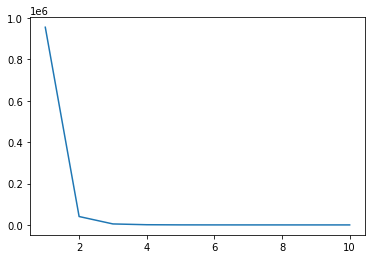

In [ ]:
user["count"].value_counts().plot()

In [ ]:
user.head()

,userID,itemID,categories,week of month,count
0,0,1505,"[3392, 179, 1390, 563, 383, 1886]",1,1
1,0,6446,"[545, 1032, 3963]",2,1
2,0,6446,"[545, 1032, 3963]",3,1
3,0,9325,"[3024, 1772, 1136, 3882, 948, 4071]",3,1
4,0,12468,"[3224, 2690, 2700]",1,1


In [16]:
user_ext = items["categories"].apply(lambda x: x.replace('[','').replace(']','')) 

AttributeError: ignored

In [10]:
user_ext = items["categories"].str.strip('[]')

In [15]:
user_ext

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,[2890,855,3908,3909],None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2,[3270,163,284,1694,12,3837,2422,3595,3561,3912,...,None,None,None,None,None,None,None,None,None,None
3,[3270],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[2470],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,[3502,1088,2004,691,3422,2308,308,3688,284,12,...,None,None,None,None,None,None,None,None,None,None
32772,[3900,3905,3903,3910,1807,274,1467,914],None,None,...,None,None,None,None,None,None,None,None,None,None
32773,[2686,2609,725],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
32774,[3900,3910,3903,2473,914,274],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
user["userID"].unique()

array([    0,     1,     2, ..., 46135, 46136, 46137])

In [ ]:
item_orders["week of month"] = item_orders["date"].apply(lambda d: (d.day-1) // 7 + 1)
item_orders["week of month"] = item_orders["week of month"].replace(to_replace=5, value=0)
item_orders.head()

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories,week of month
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]",1
1,2020-06-01,42535,30474,1,193,10,3,229,3,132,"[3459, 3738, 679, 1628, 4072]",1
2,2020-06-01,42535,15833,1,1318,4,1,455,0,108,"[2973, 2907, 2749, 3357]",1
3,2020-06-01,42535,20131,1,347,4,0,291,3,44,"[30, 1515, 1760, 2932, 1287, 2615, 3727, 2450,...",1
4,2020-06-01,42535,4325,1,539,6,0,303,0,45,"[3104, 1772, 2029, 1274, 3915, 888, 1118, 3882...",1


In [ ]:
height = item_orders["week of month"].value_counts()

In [ ]:
height

2    252987
3    246415
1    237031
4    235858
0     99247
Name: week of month, dtype: int64

In [ ]:
item_orders["week of month"].unique()

array([1, 2, 3, 4, 0])

<BarContainer object of 5 artists>

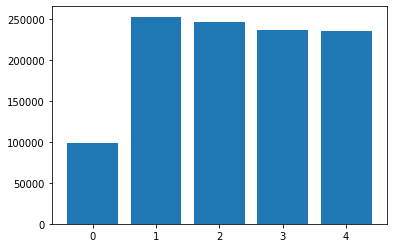

In [ ]:
plt.bar(item_orders["week of month"].unique(),height)

In [ ]:
item_orders["userID"].unique().shape

(46138,)

In [ ]:
user_freq = item_orders["userID"].value_counts()

In [ ]:
user_freq.unique()

array([278, 198, 192, 191, 184, 175, 161, 159, 153, 148, 141, 137, 134,
       133, 132, 129, 128, 127, 123, 122, 121, 120, 119, 118, 117, 116,
       115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103,
       102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,
        89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,
        76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,
        63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,
        37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,
        24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,
        11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1])

In [ ]:
item_freq = item_orders["itemID"].value_counts()

In [ ]:
item_freq

29657    10446
18630     8513
20131     4963
16059     4377
11251     4343
         ...  
9883         1
20621        1
20386        1
9672         1
11196        1
Name: itemID, Length: 31756, dtype: int64